In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Data splitting
from sklearn.model_selection import train_test_split

# Preprocessing
from sklearn.preprocessing import StandardScaler  # for feature scaling
from sklearn.preprocessing import LabelEncoder# for encoding categorical variables
from sklearn.preprocessing import OneHotEncoder # for one-hot encoding categorical variables
from sklearn.preprocessing import OrdinalEncoder


# Models (choose based on your problem)
from sklearn.linear_model import LogisticRegression  # Classification
from sklearn.linear_model import LinearRegression    # Regression
from sklearn.ensemble import RandomForestClassifier  # Classification
from sklearn.ensemble import RandomForestRegressor   # Regression
# column transformation
from sklearn.compose import ColumnTransformer
# pipeline
from sklearn.pipeline import Pipeline
# Model evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report  # for classification
from sklearn.metrics import mean_squared_error, r2_score    

In [92]:
# importing datasets
df = pd.read_csv(r'C:\Users\Sumit Saha\Downloads\Processed_Flipdata - Processed_Flipdata.csv')

In [93]:
pd.set_option('display.max_columns',50)

In [94]:
# sampel of the data
df.head()

,Unnamed: 0,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,0,Infinix SMART 7,Night Black,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
1,1,Infinix SMART 7,Azure Blue,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
2,2,MOTOROLA G32,Mineral Gray,128,8,5000,50MP,16MP,0,16.64,Qualcomm Snapdragon 680,"11,999"
3,3,POCO C50,Royal Blue,32,2,5000,8MP,5MP,0,16.56,Mediatek Helio A22,"5,649"
4,4,Infinix HOT 30i,Marigold,128,8,5000,50MP,5MP,1,16.76,G37,"8,999"


In [62]:
df.shape

(541, 12)

In [95]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     541 non-null    int64  
 1   Model          541 non-null    object 
 2   Colour         541 non-null    object 
 3   Memory         541 non-null    int64  
 4   RAM            541 non-null    int64  
 5   Battery_       541 non-null    int64  
 6   Rear Camera    541 non-null    object 
 7   Front Camera   541 non-null    object 
 8   AI Lens        541 non-null    int64  
 9   Mobile Height  541 non-null    float64
 10  Processor_     541 non-null    object 
 11  Prize          541 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 50.8+ KB


In [96]:
df['Prize']

0       7,299
1       7,299
2      11,999
3       5,649
4       8,999
        ...  
536    79,999
537     5,998
538     9,990
539    38,999
540    15,999
Name: Prize, Length: 541, dtype: object

In [101]:
df['Prize']=df['Prize'].str.replace(',','')

In [102]:
df['Prize']=pd.to_numeric(df['Prize'],errors='coerce')

In [103]:
df['Prize']

0       7299
1       7299
2      11999
3       5649
4       8999
       ...  
536    79999
537     5998
538     9990
539    38999
540    15999
Name: Prize, Length: 541, dtype: int64

In [104]:
df.corr(numeric_only=True)

,Unnamed: 0,Memory,RAM,Battery_,AI Lens,Mobile Height,Prize
Unnamed: 0,1.000000,0.120579,0.084103,-0.057136,-0.160373,0.015372,0.333940
Memory,0.120579,1.000000,0.625284,-0.053210,-0.094442,0.063163,0.566660
RAM,0.084103,0.625284,1.000000,-0.104923,-0.082622,0.092951,0.532024
Battery_,-0.057136,-0.053210,-0.104923,1.000000,0.150156,0.695641,-0.034297
AI Lens,-0.160373,-0.094442,-0.082622,0.150156,1.000000,0.052018,-0.153691
Mobile Height,0.015372,0.063163,0.092951,0.695641,0.052018,1.000000,0.176009
Prize,0.333940,0.566660,0.532024,-0.034297,-0.153691,0.176009,1.000000


In [105]:
df['Rear Camera'],df['Front Camera']

(0      13MP
 1      13MP
 2      50MP
 3       8MP
 4      50MP
        ... 
 536    50MP
 537     5MP
 538    50MP
 539    50MP
 540    50MP
 Name: Rear Camera, Length: 541, dtype: object,
 0       5MP
 1       5MP
 2      16MP
 3       5MP
 4       5MP
        ... 
 536    12MP
 537     2MP
 538     8MP
 539    32MP
 540     8MP
 Name: Front Camera, Length: 541, dtype: object)

In [106]:
def clean_camera_column(df, column_name):
    """
    Remove 'MP', extract numeric value, and convert to integer (nullable Int64).
    Handles NaN and non-string values safely.
    """
    return (
        df[column_name]
        .astype(str)                          # Convert everything to string
        .str.replace('MP', '', regex=False)   # Remove 'MP'
        .str.extract(r'(\d+)')                # Extract first number
        .astype(float)                        # Convert to float
        .astype('Int64')                      # Nullable integer type
    )

# Apply cleaning
df['Rear Camera'] = clean_camera_column(df, 'Rear Camera')
df['Front Camera'] = clean_camera_column(df, 'Front Camera')





In [128]:
df['Rear Camera'],df['Front Camera']

(0      13
 1      13
 2      50
 3       8
 4      50
        ..
 536    50
 537     5
 538    50
 539    50
 540    50
 Name: Rear Camera, Length: 541, dtype: Int64,
 0       5
 1       5
 2      16
 3       5
 4       5
        ..
 536    12
 537     2
 538     8
 539    32
 540     8
 Name: Front Camera, Length: 541, dtype: Int64)

In [129]:
price_bins = [0, 8000, 15000, 30000, 100000]
price_labels = ['Budget', 'Mid-Range', 'Premium', 'Flagship']

df['Price_Category'] = pd.cut(
    df['Prize'],
    bins=price_bins,
    labels=price_labels
)

# 3. Preview the results
print(df[['Prize', 'Price_Category']].head())

   Prize Price_Category
0   7299         Budget
1   7299         Budget
2  11999      Mid-Range
3   5649         Budget
4   8999      Mid-Range


In [130]:
df

,Unnamed: 0,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize,Price_Category
0,0,Infinix SMART 7,Night Black,64,4,6000,13,5,1,16.76,Unisoc Spreadtrum SC9863A1,7299,Budget
1,1,Infinix SMART 7,Azure Blue,64,4,6000,13,5,1,16.76,Unisoc Spreadtrum SC9863A1,7299,Budget
2,2,MOTOROLA G32,Mineral Gray,128,8,5000,50,16,0,16.64,Qualcomm Snapdragon 680,11999,Mid-Range
3,3,POCO C50,Royal Blue,32,2,5000,8,5,0,16.56,Mediatek Helio A22,5649,Budget
4,4,Infinix HOT 30i,Marigold,128,8,5000,50,5,1,16.76,G37,8999,Mid-Range
...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,637,SAMSUNG Galaxy S23 5G,Cream,256,8,3900,50,12,0,15.49,Qualcomm Snapdragon 8 Gen 2,79999,Flagship
537,638,LAVA Z21,Cyan,32,2,3100,5,2,0,12.70,Octa Core,5998,Budget
538,639,Tecno Spark 8T,Turquoise Cyan,64,4,5000,50,8,0,16.76,MediaTek Helio G35,9990,Mid-Range
539,641,SAMSUNG Galaxy A54 5G,Awesome Lime,128,8,5000,50,32,0,16.26,"Exynos 1380, Octa Core",38999,Flagship


In [131]:
correlation_matrix = df.corr(numeric_only=True)
correlation_matrix

,Unnamed: 0,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Prize
Unnamed: 0,1.000000,0.120579,0.084103,-0.057136,0.036324,0.233370,-0.160373,0.015372,0.333940
Memory,0.120579,1.000000,0.625284,-0.053210,0.530615,0.496865,-0.094442,0.063163,0.566660
RAM,0.084103,0.625284,1.000000,-0.104923,0.439558,0.493861,-0.082622,0.092951,0.532024
Battery_,-0.057136,-0.053210,-0.104923,1.000000,0.198260,0.032970,0.150156,0.695641,-0.034297
Rear Camera,0.036324,0.530615,0.439558,0.198260,1.000000,0.505378,-0.043597,0.239883,0.410367
Front Camera,0.233370,0.496865,0.493861,0.032970,0.505378,1.000000,-0.111779,0.208012,0.532321
AI Lens,-0.160373,-0.094442,-0.082622,0.150156,-0.043597,-0.111779,1.000000,0.052018,-0.153691
Mobile Height,0.015372,0.063163,0.092951,0.695641,0.239883,0.208012,0.052018,1.000000,0.176009
Prize,0.333940,0.566660,0.532024,-0.034297,0.410367,0.532321,-0.153691,0.176009,1.000000


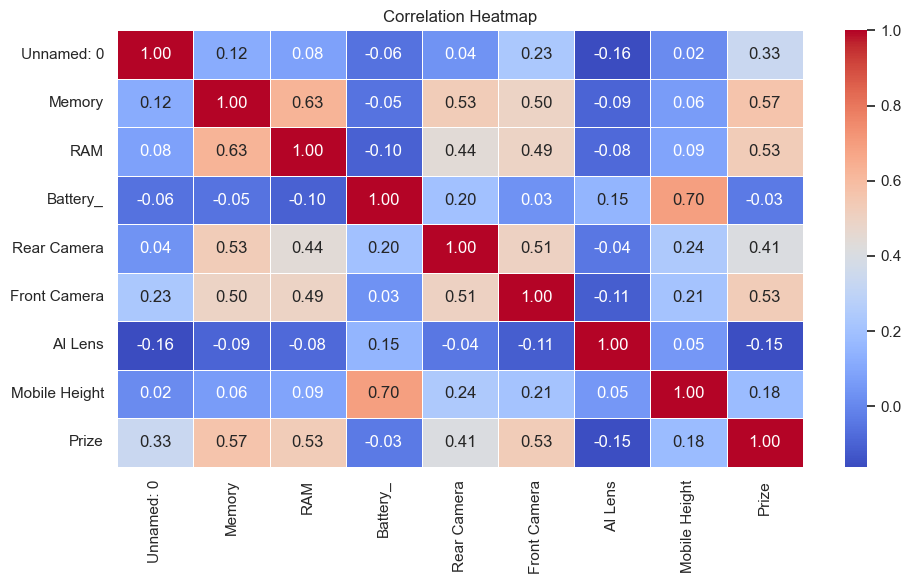

In [132]:
# Step 4: Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

In [133]:
# MOSTLY MEMORY,FRONT CAMERA,REAR CAMERA AND RAM IS AFFECTING THE PRICE OF SMARTPHONE therefore DROPPING BATTERY AND AI LENSabs
new_df = df.drop(['AI Lens','Battery_',],axis=1)
new_df

,Unnamed: 0,Model,Colour,Memory,RAM,Rear Camera,Front Camera,Mobile Height,Processor_,Prize,Price_Category
0,0,Infinix SMART 7,Night Black,64,4,13,5,16.76,Unisoc Spreadtrum SC9863A1,7299,Budget
1,1,Infinix SMART 7,Azure Blue,64,4,13,5,16.76,Unisoc Spreadtrum SC9863A1,7299,Budget
2,2,MOTOROLA G32,Mineral Gray,128,8,50,16,16.64,Qualcomm Snapdragon 680,11999,Mid-Range
3,3,POCO C50,Royal Blue,32,2,8,5,16.56,Mediatek Helio A22,5649,Budget
4,4,Infinix HOT 30i,Marigold,128,8,50,5,16.76,G37,8999,Mid-Range
...,...,...,...,...,...,...,...,...,...,...,...
536,637,SAMSUNG Galaxy S23 5G,Cream,256,8,50,12,15.49,Qualcomm Snapdragon 8 Gen 2,79999,Flagship
537,638,LAVA Z21,Cyan,32,2,5,2,12.70,Octa Core,5998,Budget
538,639,Tecno Spark 8T,Turquoise Cyan,64,4,50,8,16.76,MediaTek Helio G35,9990,Mid-Range
539,641,SAMSUNG Galaxy A54 5G,Awesome Lime,128,8,50,32,16.26,"Exynos 1380, Octa Core",38999,Flagship


In [163]:
def categorize_processor(proc):
    if pd.isna(proc):
        return 'Unknown'
    proc = proc.lower()
    if 'intel' in proc:
        return 'Intel'
    elif 'ryzen' in proc or 'amd' in proc:
        return 'AMD'
    elif 'snapdragon' in proc:
        return 'Snapdragon'
    elif 'mediatek' in proc:
        return 'Mediatek'
    else:
        return 'Other'

# Apply and add to DataFrame
new_df['Processor_Brand'] =new_df['Processor_'].apply(categorize_processor)

# Check the result
print(new_df[['Processor_', 'Processor_Brand']].head())

                   Processor_ Processor_Brand
0  Unisoc Spreadtrum SC9863A1           Other
1  Unisoc Spreadtrum SC9863A1           Other
2     Qualcomm Snapdragon 680      Snapdragon
3          Mediatek Helio A22        Mediatek
4                         G37           Other


In [164]:
new_df

,Unnamed: 0,Model,Colour,Memory,RAM,Rear Camera,Front Camera,Mobile Height,Processor_,Prize,Price_Category,Processor_Brand
0,0,Infinix SMART 7,Night Black,64,4,13,5,16.76,Unisoc Spreadtrum SC9863A1,7299,Budget,Other
1,1,Infinix SMART 7,Azure Blue,64,4,13,5,16.76,Unisoc Spreadtrum SC9863A1,7299,Budget,Other
2,2,MOTOROLA G32,Mineral Gray,128,8,50,16,16.64,Qualcomm Snapdragon 680,11999,Mid-Range,Snapdragon
3,3,POCO C50,Royal Blue,32,2,8,5,16.56,Mediatek Helio A22,5649,Budget,Mediatek
4,4,Infinix HOT 30i,Marigold,128,8,50,5,16.76,G37,8999,Mid-Range,Other
...,...,...,...,...,...,...,...,...,...,...,...,...
536,637,SAMSUNG Galaxy S23 5G,Cream,256,8,50,12,15.49,Qualcomm Snapdragon 8 Gen 2,79999,Flagship,Snapdragon
537,638,LAVA Z21,Cyan,32,2,5,2,12.70,Octa Core,5998,Budget,Other
538,639,Tecno Spark 8T,Turquoise Cyan,64,4,50,8,16.76,MediaTek Helio G35,9990,Mid-Range,Mediatek
539,641,SAMSUNG Galaxy A54 5G,Awesome Lime,128,8,50,32,16.26,"Exynos 1380, Octa Core",38999,Flagship,Other


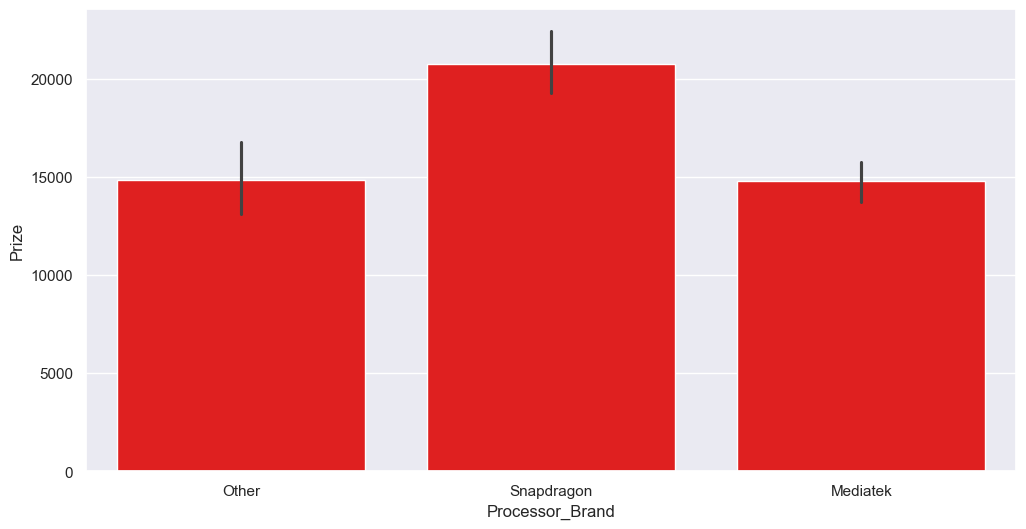

In [165]:
#checking the relation between procssor and prize
sns.set(rc={"figure.figsize": (12, 6)})
sns.barplot(data=new_df,y='Prize',x='Processor_Brand',color='red')
plt.show()

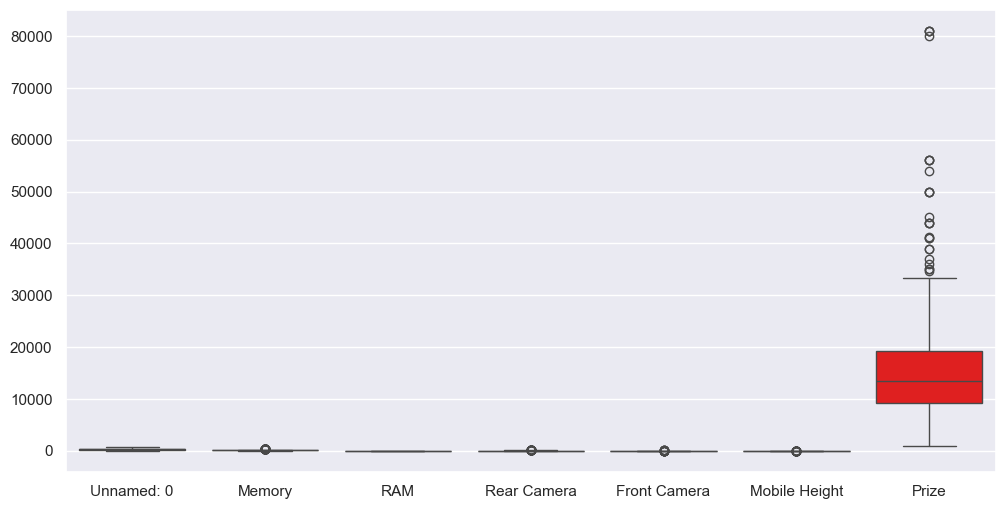

In [166]:
#checking the outiers
sns.boxplot(data=new_df,color='red')
plt.show()

In [170]:
x_train,x_test,y_train,y_test = train_test_split(new_df.drop(columns=['Prize','Colour','Model','Unnamed: 0','Processor_']),new_df['Prize'],test_size=0.2,random_state=42)

In [171]:
x_train

,Memory,RAM,Rear Camera,Front Camera,Mobile Height,Price_Category,Processor_Brand
244,16,8,2,0,6.10,Budget,Other
540,128,4,50,8,16.66,Premium,Mediatek
417,128,8,50,8,16.00,Flagship,Other
509,128,6,50,16,16.76,Premium,Mediatek
353,64,4,13,5,16.66,Mid-Range,Other
...,...,...,...,...,...,...,...
71,32,3,8,5,16.51,Budget,Other
106,32,3,8,5,16.56,Budget,Mediatek
270,64,4,50,8,17.32,Mid-Range,Other
435,32,2,13,5,16.59,Budget,Other


In [172]:
x_train.shape,x_test.shape

((432, 7), (109, 7))

In [173]:
y_train

244     3549
540    15999
417    55999
509    18990
353     8288
       ...  
71      6499
106     6299
270     8999
435     7190
102    19999
Name: Prize, Length: 432, dtype: int64

In [174]:
x_train['Processor_Brand'].value_counts()

Processor_Brand
Mediatek      169
Other         157
Snapdragon    106
Name: count, dtype: int64

In [175]:

preprocessor = ColumnTransformer(
    transformers=[
        ("tnf1", OrdinalEncoder(categories=[['Budget', 'Mid-Range', 'Premium', 'Flagship']]), ['Price_Category']),
        ("tnf2", OneHotEncoder(sparse_output=False, drop='first'), ['Processor_Brand'])
    ],
    remainder='passthrough'
)


In [176]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# -------------------------------
# 1. Build pipeline
# -------------------------------
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(random_state=42))
])

# -------------------------------
# 2. Train model
# -------------------------------
pipeline.fit(x_train, y_train)

# -------------------------------
# 3. Predict on test set
# -------------------------------
y_pred = pipeline.predict(x_test)

# -------------------------------
# 4. Evaluate model performance
# -------------------------------
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.4f}")



RMSE: 3788.85
R²: 0.8958


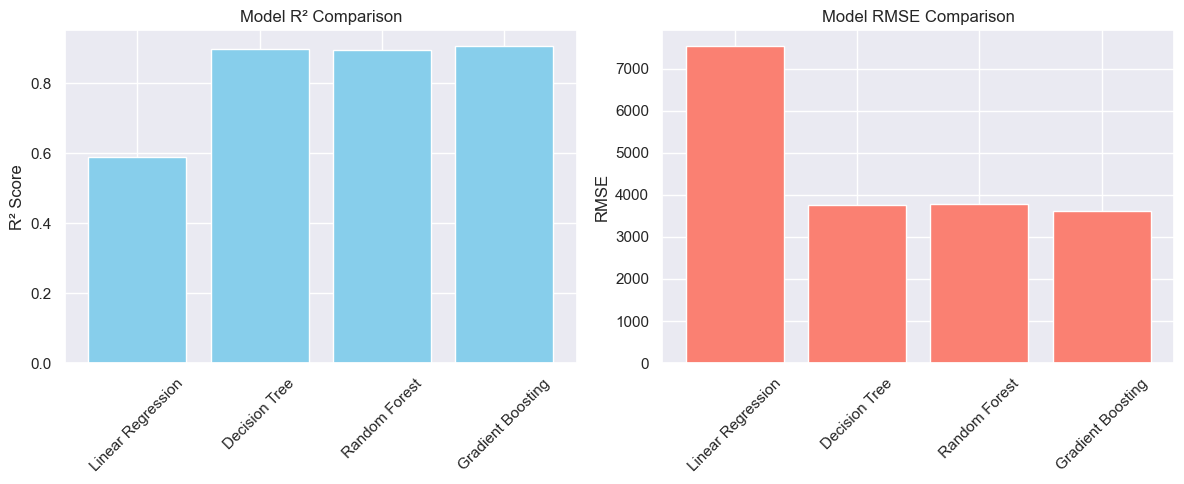

In [177]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    
}

results = {"Model": [], "R2": [], "RMSE": []}

# Loop over models
for name, model in models.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    pipeline.fit(x_train, y_train)
    y_pred = pipeline.predict(x_test)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    results["Model"].append(name)
    results["R2"].append(r2)
    results["RMSE"].append(rmse)

# Plot R² Score
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.bar(results["Model"], results["R2"], color='skyblue')
plt.ylabel("R² Score")
plt.xticks(rotation=45)
plt.title("Model R² Comparison")

# Plot RMSE
plt.subplot(1,2,2)
plt.bar(results["Model"], results["RMSE"], color='salmon')
plt.ylabel("RMSE")
plt.xticks(rotation=45)
plt.title("Model RMSE Comparison")

plt.tight_layout()
plt.show()


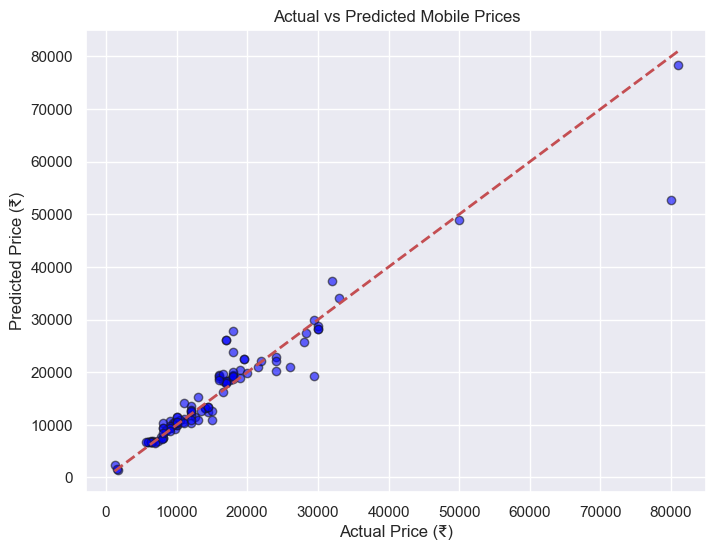

In [178]:
import matplotlib.pyplot as plt

# Scatter plot of actual vs predicted prices
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue', edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # ideal fit line
plt.xlabel("Actual Price (₹)")
plt.ylabel("Predicted Price (₹)")
plt.title("Actual vs Predicted Mobile Prices")
plt.grid(True)
plt.show()
